In [401]:
# Data Analysis
import pandas as pd
import numpy as np

# Data visusalisation
import seaborn as sns
import matplotlib.pyplot as plt

# tackling missing data
import missingno as msno
from collections import Counter

# Import warnings
import warnings

#import collections
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Classifier libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#!pip install xgboost
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB



## READ AND DISPLAY THE DATA FILE

In [84]:
Cust_churn = pd.read_csv(r"C:\Users\User\Desktop\Customer-Churn.csv")
warnings.filterwarnings('ignore')


In [85]:
Cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
Cust_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Exploratory Data Analysis

In [87]:
#1. DATA CLEANING
# Check for missing values in the data
Cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
Cust_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

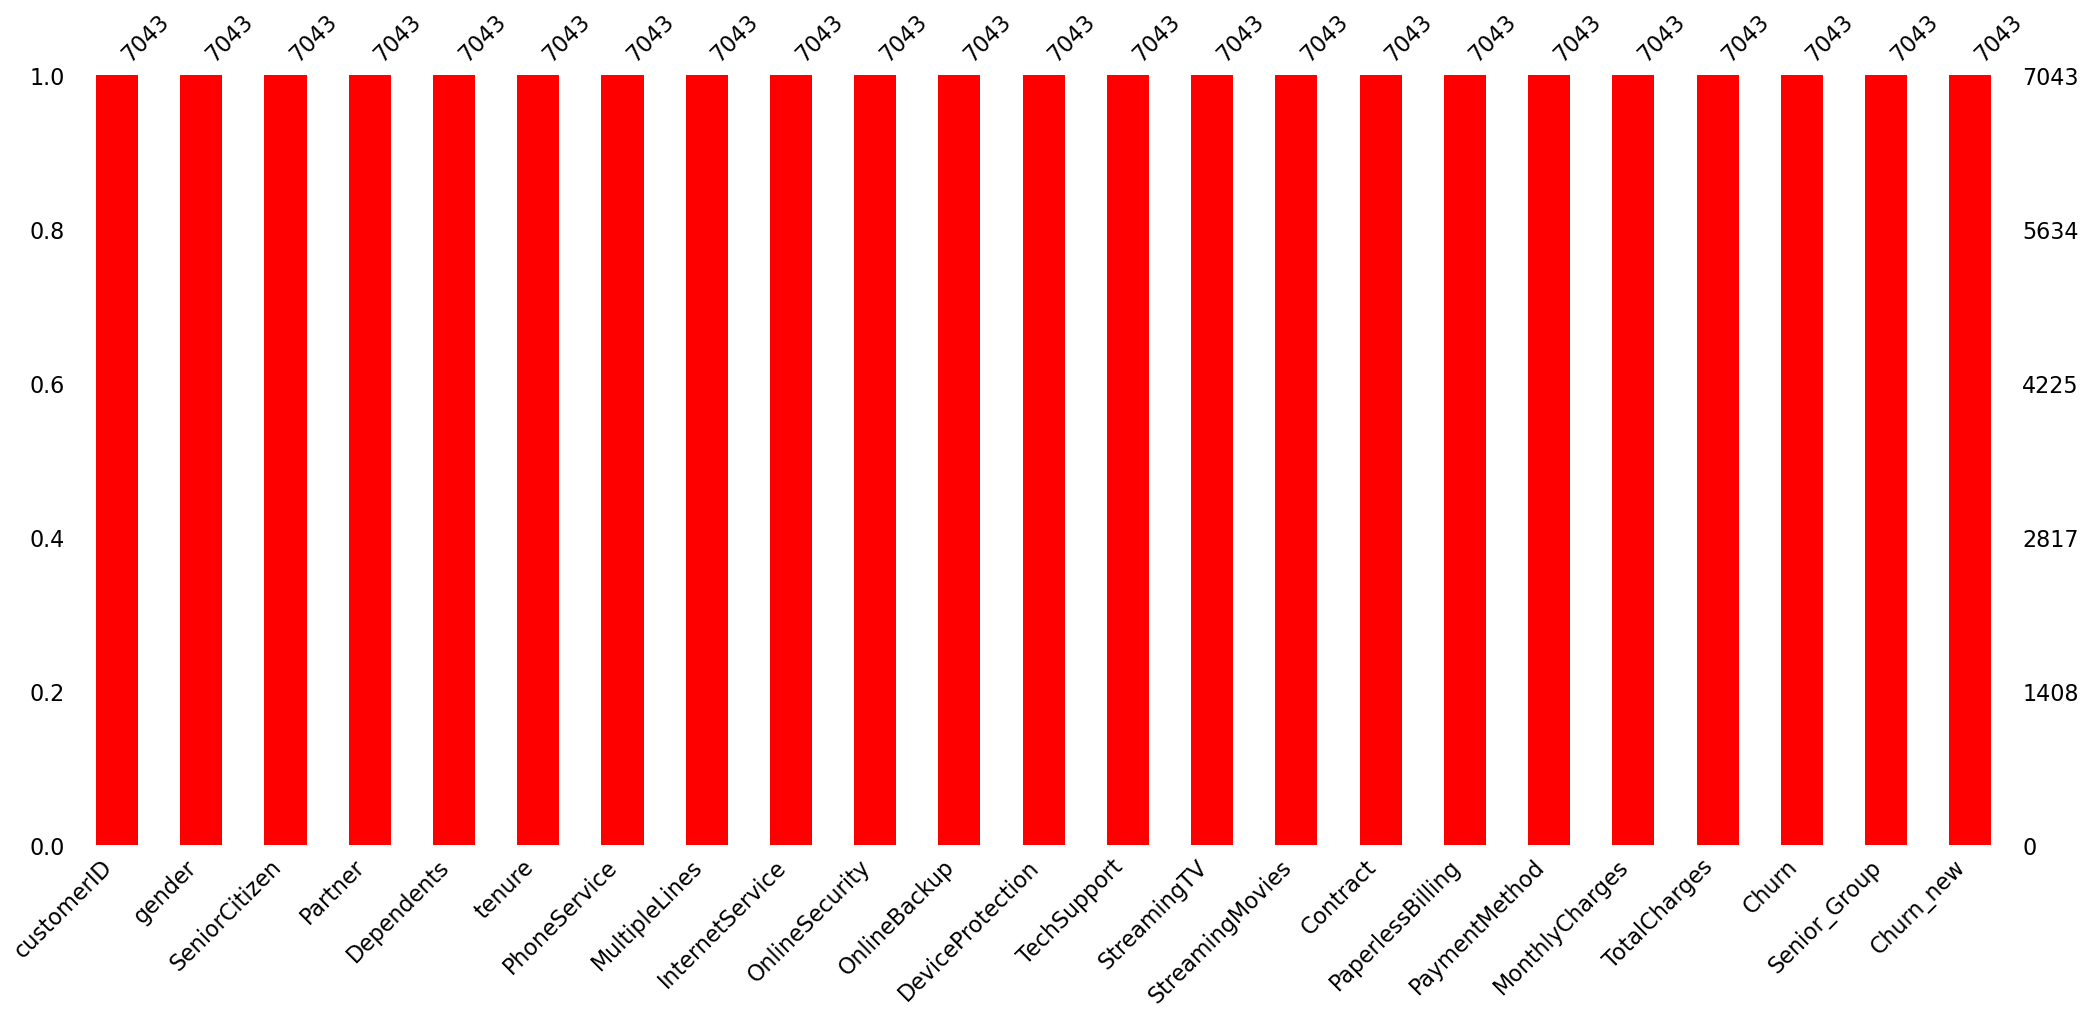

In [32]:
Cust_churn.shape
Cust_churn.isnull()
plt.Figure( figsize=(20,35))
msno.bar(Cust_churn, color='red')

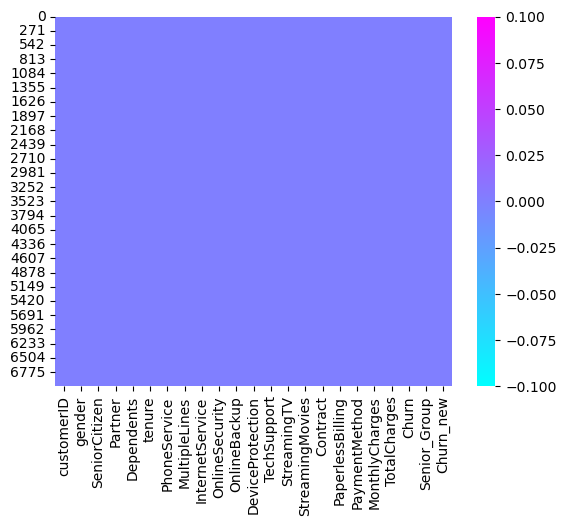

In [33]:
sns.heatmap(Cust_churn.isnull(),cbar=True, cmap="cool");
# using (.info) to check for missing values on the data, it is shown that there are no missing data as all columns has no null.

In [113]:
Cust_churn['TotalCharges'].unique
Cust_churn['TotalCharges']=pd.to_numeric(Cust_churn['TotalCharges'], errors='coerce')
Cust_churn['TotalCharges']=Cust_churn['TotalCharges'].astype(float)
Cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

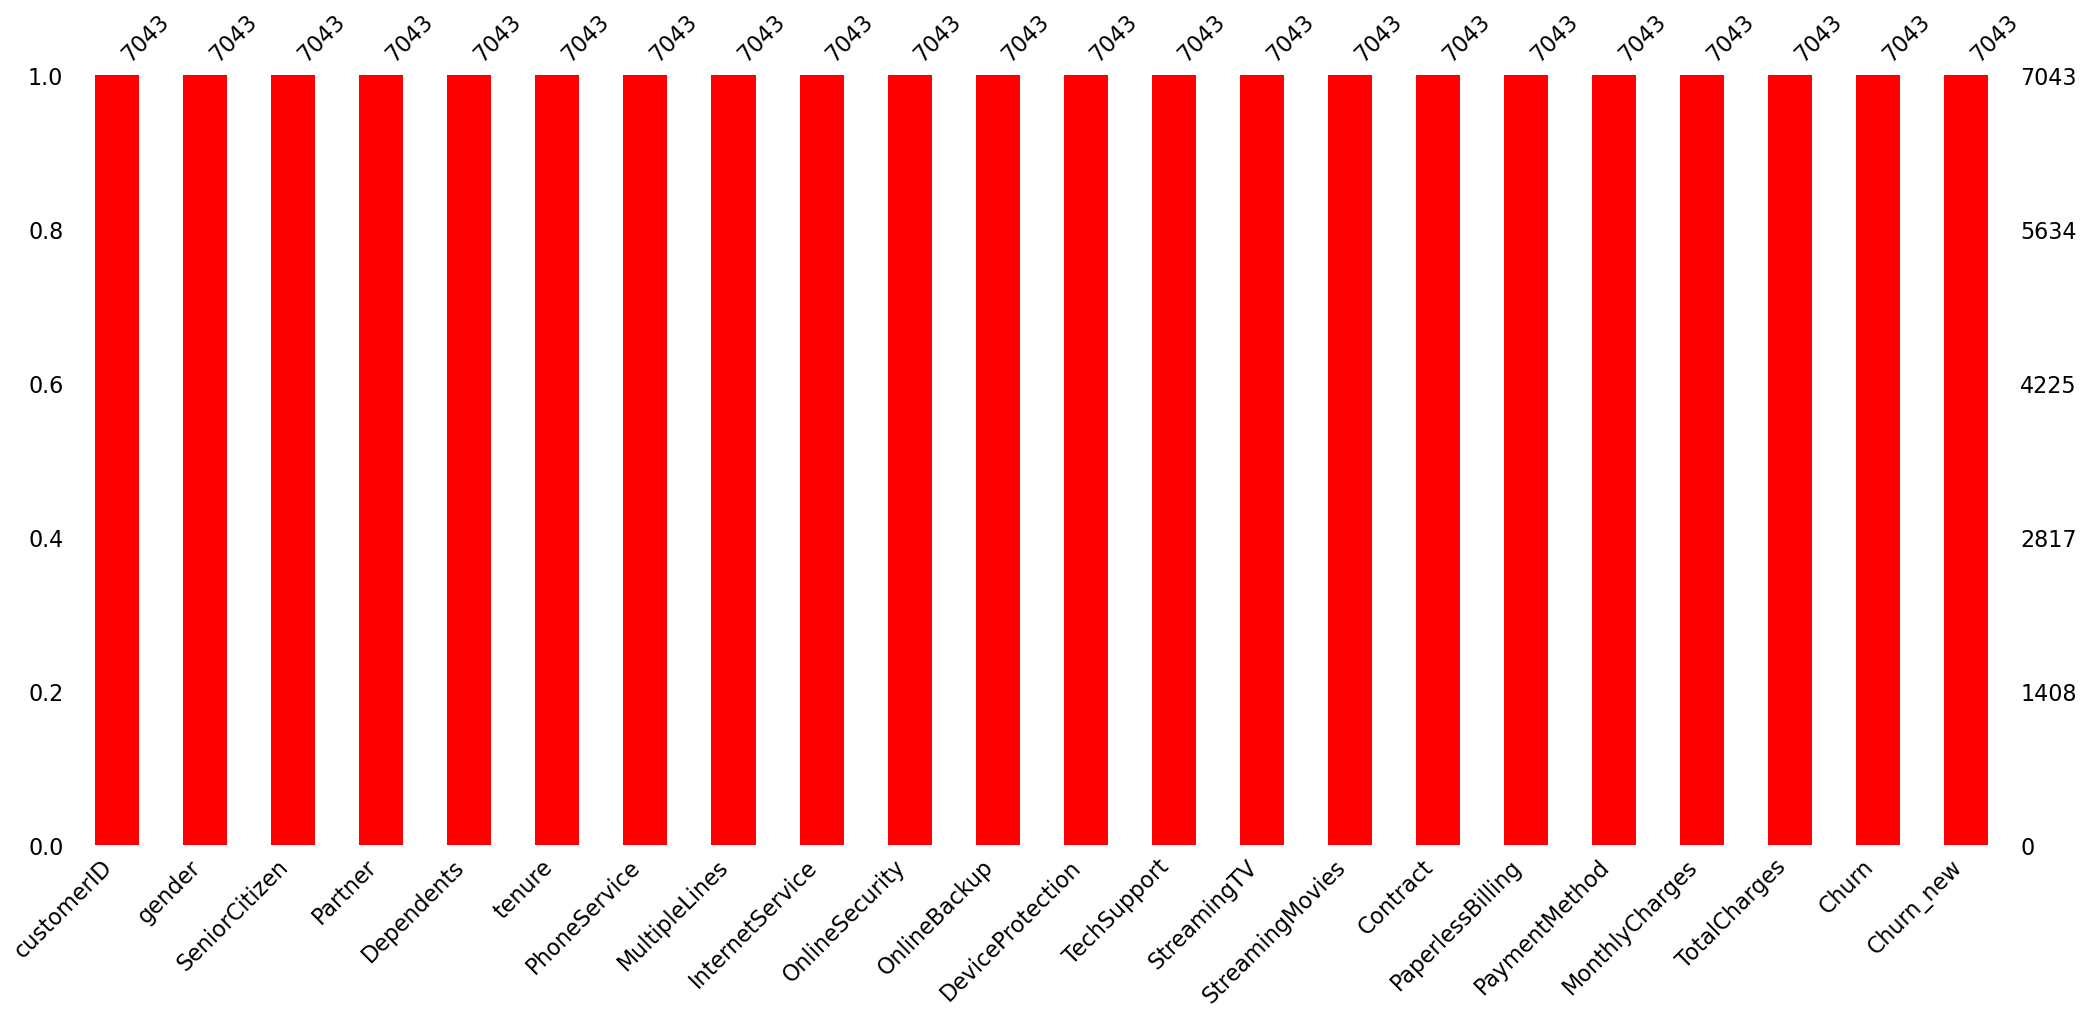

In [191]:
Cust_churn.isnull()
plt.Figure( figsize=(20,35))
msno.bar(Cust_churn, color='red')

In [36]:

 # Check for outliers
Cust_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [35]:
Cust_churn.describe(include=['bool','object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Senior_Group,Churn_new
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,2,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,NO,0
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,5901,5174


In [37]:
Cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Senior_Group,Churn_new
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NO,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,NO,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NO,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NO,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NO,1


In [38]:
#2. Feature Engineering 1
def Senior_Group(SeniorCitizen):
    if SeniorCitizen  == 1:
        return 'YES'
    else:
        return 'NO'

Cust_churn['Senior_Group'] = Cust_churn['SeniorCitizen'].apply(Senior_Group)

In [39]:
Cust_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Senior_Group,Churn_new
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,NO,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,NO,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,NO,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,YES,1
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,NO,0


In [141]:
#2. Feature Engineering 2
def Churn_new(Churn):
    if Churn == 'Yes':
        return '1'
    else:
        return '0'

Cust_churn['Churn_new'] = Cust_churn['Churn'].apply(Churn_new)


In [142]:
Cust_churn.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_new
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0


In [42]:
#3. Univariante Analysis
# Check for outliers for numerical Analysis by using boxplot
numerical_Cust_churn=Cust_churn.select_dtypes(include=['number'])
numerical_Cust_churn.drop(['SeniorCitizen'], axis=1, inplace=True)
numerical_column = numerical_Cust_churn.columns
numerical_Cust_churn.head(5)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [43]:
numerical_column

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

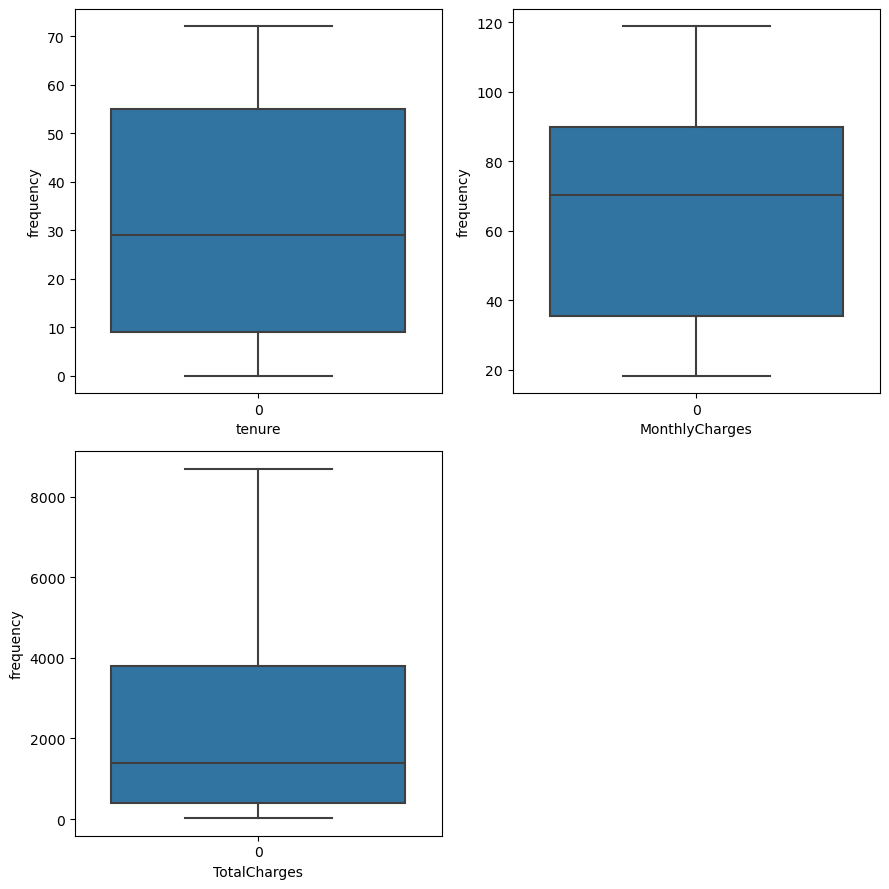

In [198]:
plt.figure(figsize=(9,9))
for i, column_name in enumerate(numerical_column,1):
    plt.subplot(2,2, i)
    sns.boxplot(Cust_churn[column_name])
    plt.xlabel(column_name)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

In [121]:
#replace missing values for TotalCharges using the mean values (Note: Mean is used because the distribution is normal and not skewed)
Cust_churn.fillna(Cust_churn['TotalCharges'].mean(), inplace=True)
Cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [128]:
Cust_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

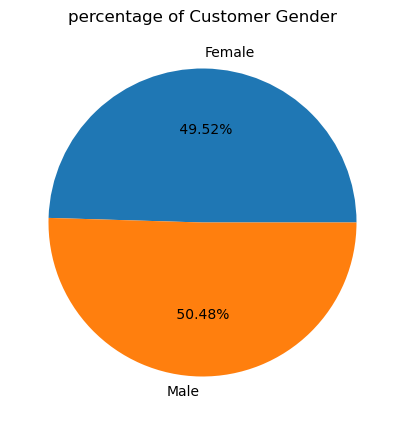

In [59]:
# univariant analysis for customer Gender
from collections import Counter
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(Cust_churn['gender'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda P:f'{P: .2f}%')
ax.set_title('percentage of Customer Gender')
plt.show()
                     

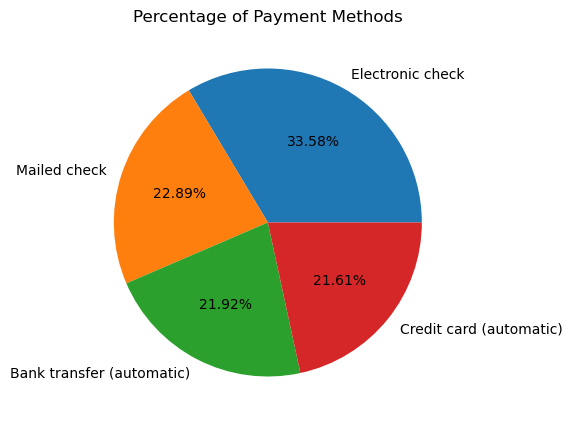

In [61]:
# univariant analysis for payment method
fig, ax = plt.subplots(figsize=(5,5))
count = Counter(Cust_churn['PaymentMethod'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda P: f'{P:.2f}%')
ax.set_title('Percentage of Payment Methods')
plt.show()

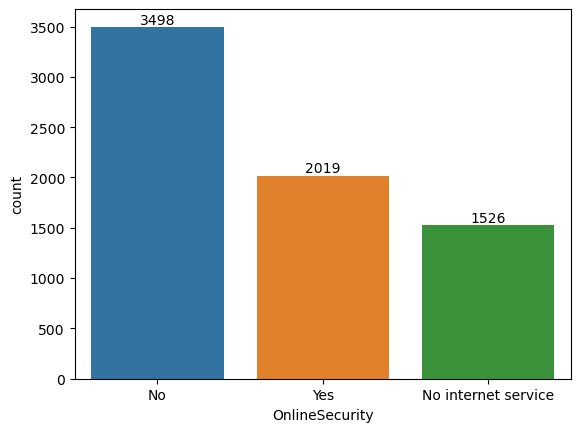

In [62]:
# univariant analysis for internet service provision
ax = sns.countplot(x = Cust_churn['OnlineSecurity'], order =Cust_churn['OnlineSecurity'].value_counts(ascending=False).index)
values = Cust_churn['OnlineSecurity'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);


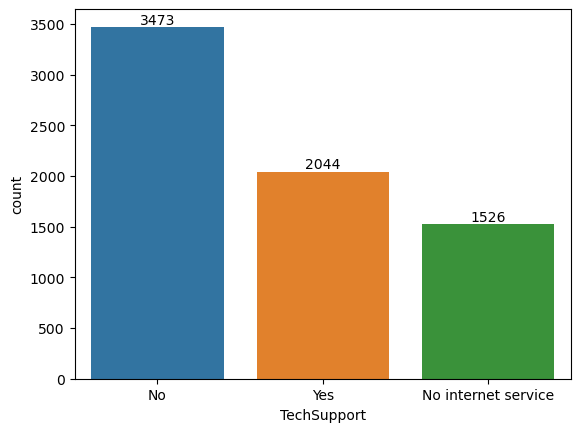

In [63]:
# Univariant analysis for Techsupport provision
ax = sns.countplot(x = Cust_churn['TechSupport'], order =Cust_churn['TechSupport'].value_counts(ascending=False).index)
values = Cust_churn['TechSupport'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

In [ ]:
Cust_churn.head(1)


<Axes: xlabel='SeniorCitizen', ylabel='count'>

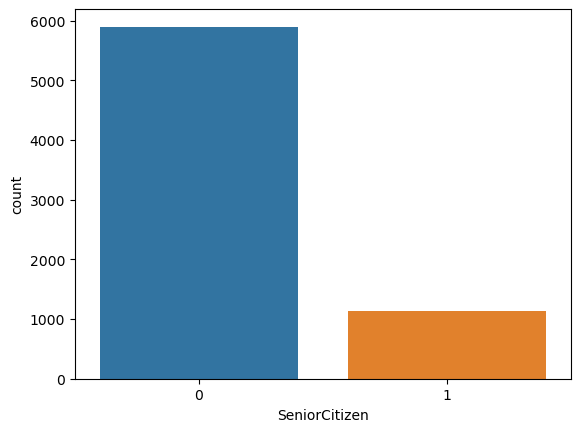

In [64]:
sns.countplot(x='SeniorCitizen', data=Cust_churn)

<Axes: xlabel='Partner', ylabel='count'>

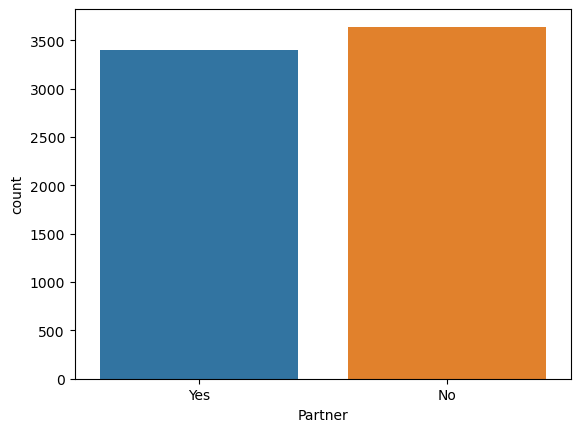

In [65]:
sns.countplot(x='Partner', data=Cust_churn)

<Axes: xlabel='Dependents', ylabel='count'>

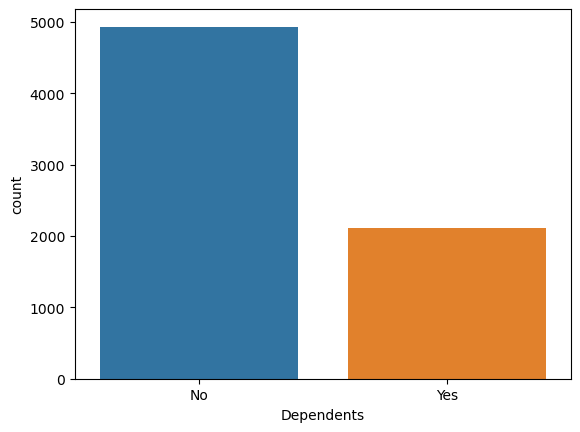

In [129]:
sns.countplot(x='Dependents', data=Cust_churn)

<Axes: xlabel='PhoneService', ylabel='count'>

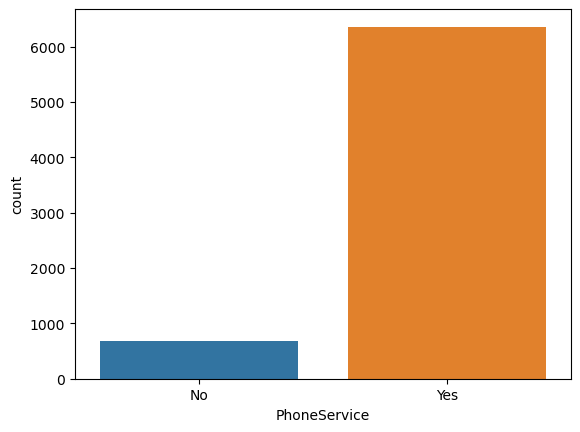

In [130]:
sns.countplot(x='PhoneService', data=Cust_churn)

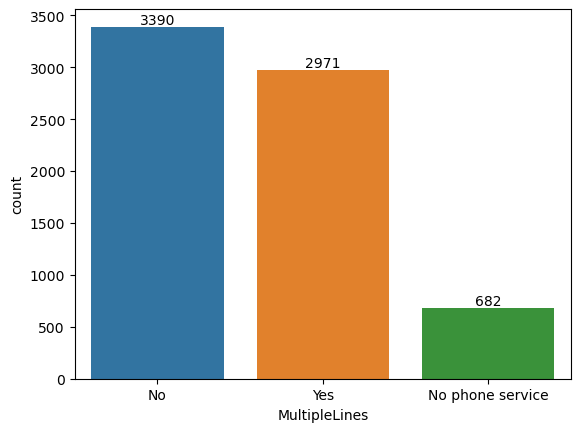

In [131]:
ax = sns.countplot(x = Cust_churn['MultipleLines'], order =Cust_churn['MultipleLines'].value_counts(ascending=False).index)
values = Cust_churn['MultipleLines'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);



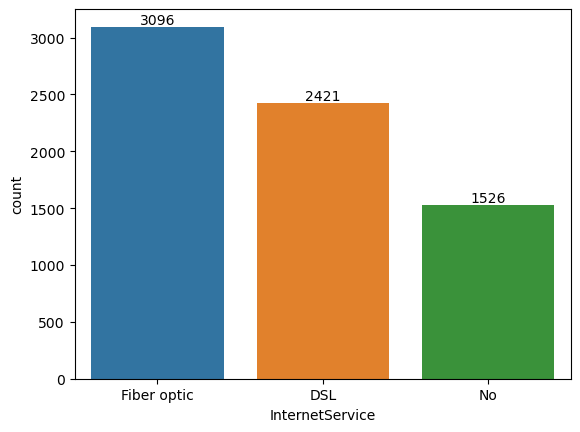

In [132]:
ax = sns.countplot(x = Cust_churn['InternetService'], order =Cust_churn['InternetService'].value_counts(ascending=False).index)
values = Cust_churn['InternetService'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);


In [ ]:
Cust_churn.head(1)

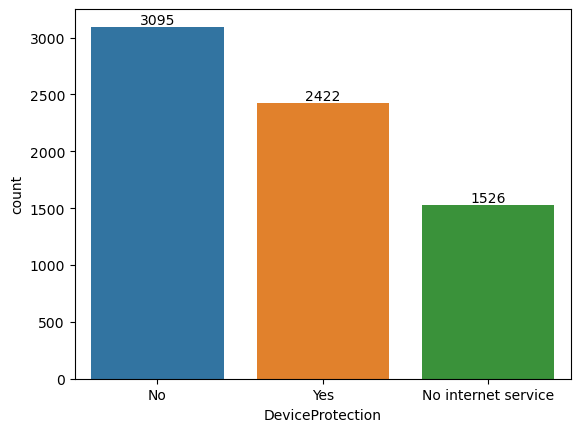

In [133]:
ax = sns.countplot(x = Cust_churn['DeviceProtection'], order =Cust_churn['DeviceProtection'].value_counts(ascending=False).index)
values = Cust_churn['DeviceProtection'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

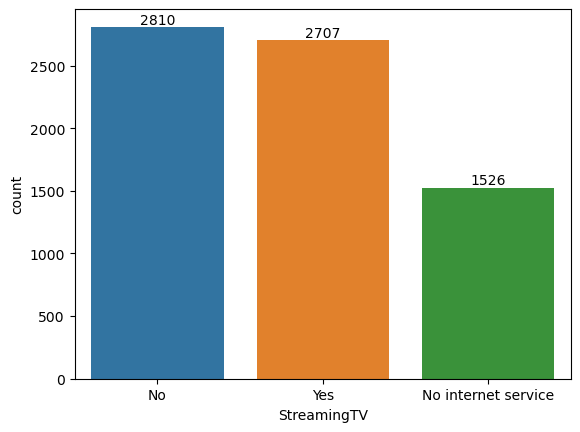

In [134]:
ax = sns.countplot(x = Cust_churn['StreamingTV'], order =Cust_churn['StreamingTV'].value_counts(ascending=False).index)
values = Cust_churn['StreamingTV'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

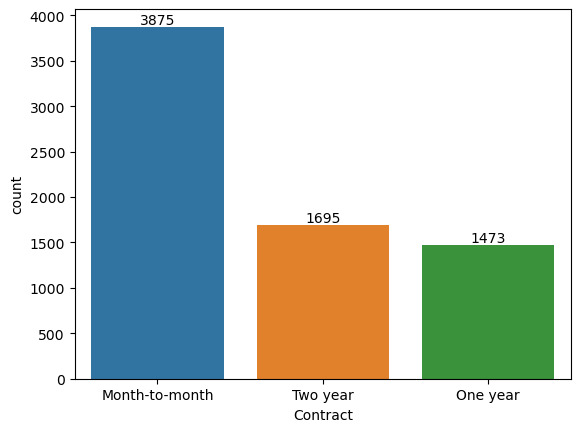

In [135]:
ax = sns.countplot(x = Cust_churn['Contract'], order =Cust_churn['Contract'].value_counts(ascending=False).index)
values = Cust_churn['Contract'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

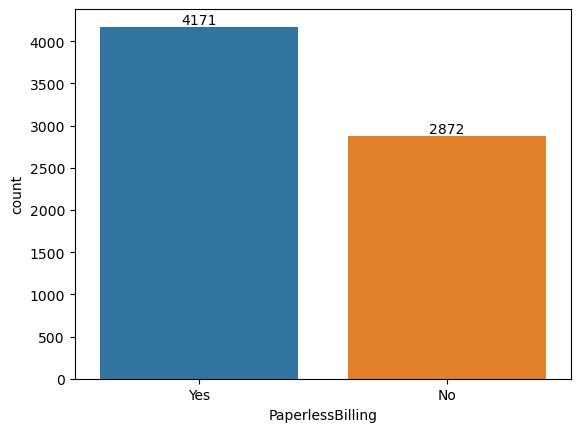

In [136]:
ax = sns.countplot(x = Cust_churn['PaperlessBilling'], order =Cust_churn['PaperlessBilling'].value_counts(ascending=False).index)
values = Cust_churn['PaperlessBilling'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values);

<Axes: xlabel='Churn', ylabel='count'>

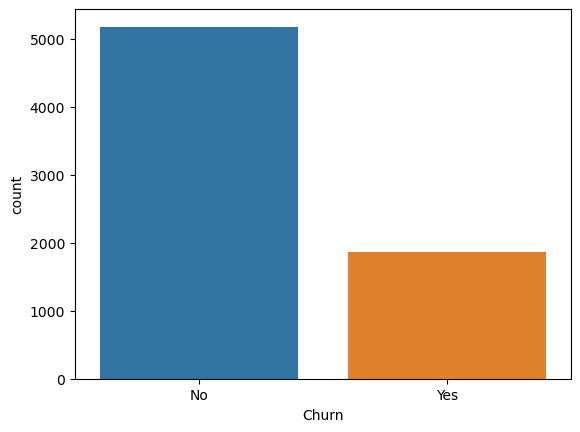

In [137]:
sns.countplot(x='Churn', data=Cust_churn)


In [ ]:
# Bivarainat Analysis
numerical_column

In [138]:
list(numerical_column)

['tenure', 'MonthlyCharges', 'TotalCharges']

In [139]:
Cust_churn.head(1)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


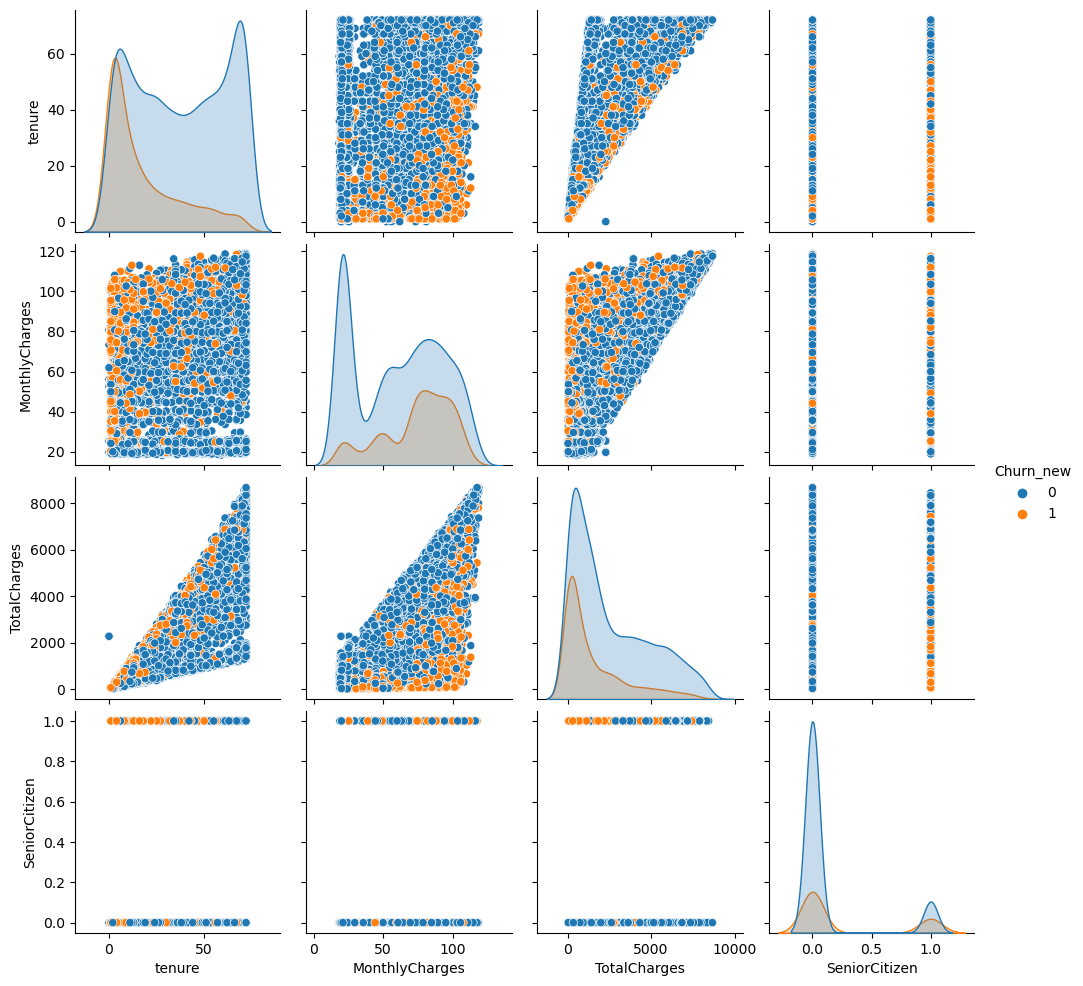

In [143]:
sns.pairplot(Cust_churn[list(numerical_column) + ['SeniorCitizen', 'Churn_new']], hue='Churn_new')

In [ ]:
#Multivariant analysis
# Correlation analysis

In [144]:
correlation_Matrix = Cust_churn[list(numerical_column) + ['SeniorCitizen', 'Churn_new']].corr()

In [145]:
correlation_Matrix

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn_new
tenure,1.000000,0.247900,0.824757,0.016567,-0.352229
MonthlyCharges,0.247900,1.000000,0.650468,0.220173,0.193356
TotalCharges,0.824757,0.650468,1.000000,0.102395,-0.199428
SeniorCitizen,0.016567,0.220173,0.102395,1.000000,0.150889
Churn_new,-0.352229,0.193356,-0.199428,0.150889,1.000000


<Axes: >

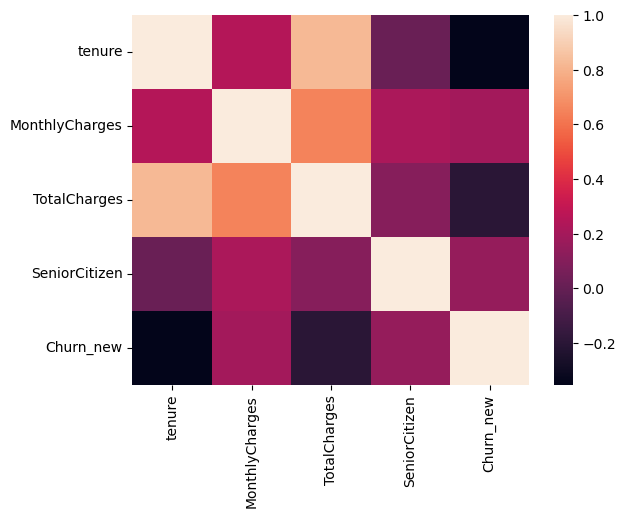

In [146]:
sns.heatmap(correlation_Matrix)


### Data Pre-processing

In [147]:
features = Cust_churn.drop(['Churn_new','Churn','OnlineBackup','customerID','Partner','Dependents','PhoneService','MultipleLines','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'InternetService','OnlineSecurity','DeviceProtection','TechSupport','gender'], axis=1)

In [364]:
labels = Cust_churn[['Churn_new']]

In [365]:
features.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85


In [366]:
# Split data into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,test_size=0.3, random_state = 42)
# X-features,  Y-labels

In [367]:
len(X_train)

4930

In [152]:
len(X_test)

2113

In [153]:
# standardize our training data
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1695,0,54,70.70,3770.00
1095,0,1,80.55,80.55
3889,0,13,19.30,259.65
3667,1,24,96.55,2263.45
2902,1,6,74.10,450.90
...,...,...,...,...
3772,0,1,95.00,95.00
5191,0,23,91.10,2198.30
5226,0,12,21.15,306.05
5390,1,12,99.45,1200.15


In [154]:
Y_train

,Churn_new
1695,0
1095,0
3889,0
3667,0
2902,0
...,...
3772,1
5191,0
5226,0
5390,1


In [155]:
labels.shape

(7043, 1)

In [156]:
labels.squeeze().shape   # It reduces the column to just one column

(7043,)

In [368]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels.squeeze(),test_size=0.2, random_state = 42)

In [369]:
# Standardize our training data
scaler = StandardScaler()


In [370]:
X_train_Scaled = scaler.fit_transform(X_train.select_dtypes(include=['number']))


In [371]:

X_test_Scaled = scaler.fit_transform(X_test.select_dtypes(include=['number']))

In [161]:
X_train_Scaled.shape


(5634, 4)

In [162]:
X_test_Scaled.shape

(1409, 4)

In [163]:
Y_train.shape

(5634,)

In [164]:
Y_test.shape

(1409,)

## MACHINE LEARNING MODEL

In [372]:
# initialise model 1 
Log_Reg_Model = LogisticRegression()

In [373]:
# Train the model with your data
Log_Reg_Model.fit(X_train_Scaled, Y_train)

LogisticRegression()

In [374]:
# Make prediction with the test data set
Y_pred=Log_Reg_Model.predict(X_test_Scaled)

In [375]:
Y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [376]:
Y_pred.shape

(1409,)

In [377]:
Y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn_new, Length: 1409, dtype: object

In [378]:
# Evaluate and display the result of the model
print('Logistic Regression')
accuracy = accuracy_score(Y_test,Y_pred)*100
report = classification_report(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

Logistic Regression


Logistic Regression
accuracy:  80.55358410220013
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.47      0.56       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409

confusion_matrix: 
 [[960  76]
 [198 175]]


<Axes: >

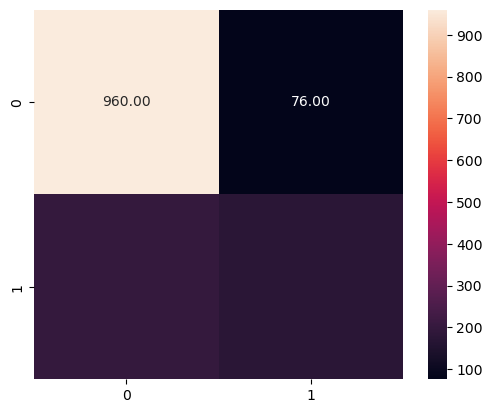

In [379]:
# Display Results
print('Logistic Regression')
print('accuracy: ', accuracy)
print('Classification_Report: \n',report)
print('confusion_matrix: \n', matrix)
sns.heatmap(matrix, annot=True, square=True, fmt='.2f', cbar=True)

In [ ]:
# initializing and training all models using enumeration

In [380]:
# initialise model 2
Ran_For_Model = RandomForestClassifier()
          

In [381]:
# Train the model with your data
Ran_For_Model.fit(X_train_Scaled, Y_train)

RandomForestClassifier()

In [382]:
# Make prediction with the test data set
Y_pred=Ran_For_Model.predict(X_test_Scaled)

In [383]:
Y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [384]:
# Evaluate and display the result of the model
print('Random Forest Classifier')
accuracy = accuracy_score(Y_test,Y_pred)*100
report = classification_report(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

Random Forest Classifier


Random Forest Classifier
accuracy:  76.43718949609652
Classification_Report: 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1036
           1       0.59      0.36      0.45       373

    accuracy                           0.76      1409
   macro avg       0.69      0.64      0.65      1409
weighted avg       0.74      0.76      0.74      1409

confusion_matrix: 
 [[941  95]
 [237 136]]


<Axes: >

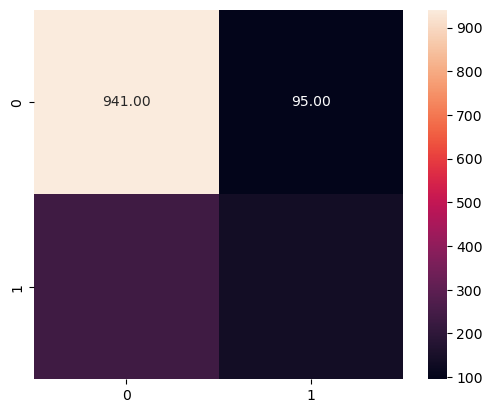

In [385]:
# Display Results
print('Random Forest Classifier')
print('accuracy: ', accuracy)
print('Classification_Report: \n',report)
print('confusion_matrix: \n', matrix)
sns.heatmap(matrix, annot=True, square=True, fmt='.2f', cbar=True)

In [386]:
## initialise model 3
Dec_Tre_Model = DecisionTreeClassifier()

In [387]:
# Train the model with your data
Dec_Tre_Model.fit(X_train_Scaled, Y_train)

DecisionTreeClassifier()

In [388]:
# Make prediction with the test data set
Y_pred=Dec_Tre_Model.predict(X_test_Scaled)

In [389]:
Y_pred

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [390]:
# Evaluate and display the result of the model
print('Decision Tree Classifier')
accuracy = accuracy_score(Y_test,Y_pred)*100
report = classification_report(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

Decision Tree Classifier


Decision Tree Classifier
accuracy:  71.25621007806954
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1036
           1       0.45      0.36      0.40       373

    accuracy                           0.71      1409
   macro avg       0.62      0.60      0.61      1409
weighted avg       0.70      0.71      0.70      1409

confusion_matrix: 
 [[869 167]
 [238 135]]


<Axes: >

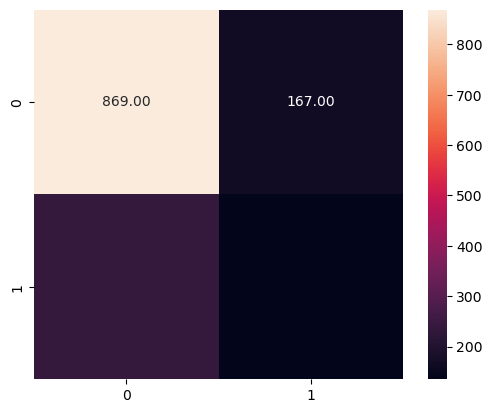

In [391]:
print('Decision Tree Classifier')
print('accuracy: ', accuracy)
print('Classification_Report: \n',report)
print('confusion_matrix: \n', matrix)
sns.heatmap(matrix, annot=True, square=True, fmt='.2f', cbar=True)

In [394]:
## initialise model 4
SVC = SVC()

In [395]:
# Train the model with your DATA
SVC.fit(X_train_Scaled, Y_train)

SVC()

In [396]:
# Make prediction with the test data set
Y_pred=SVC.predict(X_test_Scaled)

In [397]:
Y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [398]:
# Evaluate and display the result of the model
print('SVC')
accuracy = accuracy_score(Y_test,Y_pred)*100
report = classification_report(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

SVC


SVC
accuracy:  79.84386089425124
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.72      0.39      0.51       373

    accuracy                           0.80      1409
   macro avg       0.77      0.67      0.69      1409
weighted avg       0.79      0.80      0.78      1409

confusion_matrix: 
 [[979  57]
 [227 146]]


<Axes: >

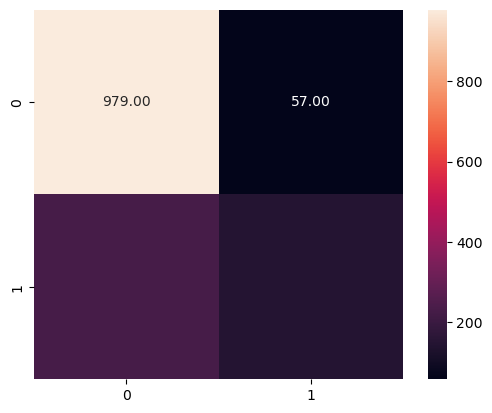

In [399]:
# Display Results
print('SVC')
print('accuracy: ', accuracy)
print('Classification_Report: \n',report)
print('confusion_matrix: \n', matrix)
sns.heatmap(matrix, annot=True, square=True, fmt='.2f', cbar=True)

## OPTIMIZING THE LABELS
### FEATURE SELECTION

In [206]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_Scaled, Y_train)

RandomForestClassifier(random_state=42)

In [211]:
# Get feature importance 
feature_importances = model.feature_importances_
feature_importances

array([0.02702671, 0.2222035 , 0.38838398, 0.36238581])

In [213]:
# Create a dataframe(dictionary) to store feature names and their importances score
feature_importances_df = pd.DataFrame({'features': features.columns, 'Importances':feature_importances})

In [214]:
feature_importances_df

,features,Importances
0,SeniorCitizen,0.027027
1,tenure,0.222204
2,MonthlyCharges,0.388384
3,TotalCharges,0.362386


In [223]:
feature_importances_df.sort_values(by='Importances', ascending = False)

,features,Importances
2,MonthlyCharges,0.388384
3,TotalCharges,0.362386
1,tenure,0.222204
0,SeniorCitizen,0.027027


<Axes: xlabel='Importances', ylabel='features'>

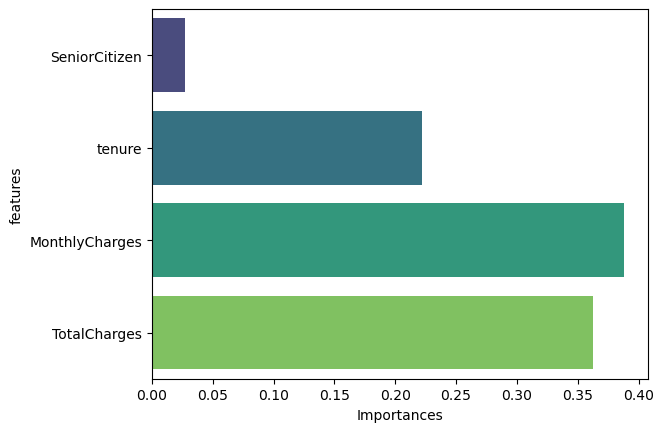

In [224]:
sns.barplot(x='Importances', y='features', data=feature_importances_df, palette ='viridis')

In [330]:
# Lets select top 3 features to check for better performances
selected_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

In [331]:
selected_features


['MonthlyCharges', 'TotalCharges', 'tenure']

In [230]:
Cust_churn.head(1)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_new
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0


In [332]:
Cust_churn[selected_features]

,MonthlyCharges,TotalCharges,tenure
0,29.85,29.85,1
1,56.95,1889.50,34
2,53.85,108.15,2
3,42.30,1840.75,45
4,70.70,151.65,2
...,...,...,...
7038,84.80,1990.50,24
7039,103.20,7362.90,72
7040,29.60,346.45,11
7041,74.40,306.60,4


In [333]:
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(Cust_churn[selected_features], labels.squeeze(),test_size=0.2, random_state = 42)

In [334]:
# Standardize our training data
scaler = StandardScaler()


In [335]:
X_train_Scaled = scaler.fit_transform(X_train.select_dtypes(include=['number']))
X_test_Scaled = scaler.fit_transform(X_test.select_dtypes(include=['number']))

In [336]:
# initialise model 1 
Log_Reg_Model = LogisticRegression()

In [338]:
# Train the model with your data
Log_Reg_Model.fit(X_train_Scaled, Y_train)

LogisticRegression()

In [339]:
Y_pred=Log_Reg_Model.predict(X_test_Scaled)
Y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [293]:
Y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn_new, Length: 1409, dtype: object

In [340]:
# Evaluate and display the result of the model
print('Logistic Regression')
accuracy = accuracy_score(Y_test,Y_pred)*100
report = classification_report(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

Logistic Regression


Logistic Regression
accuracy:  79.77288857345636
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409

confusion_matrix: 
 [[946  90]
 [195 178]]


<Axes: >

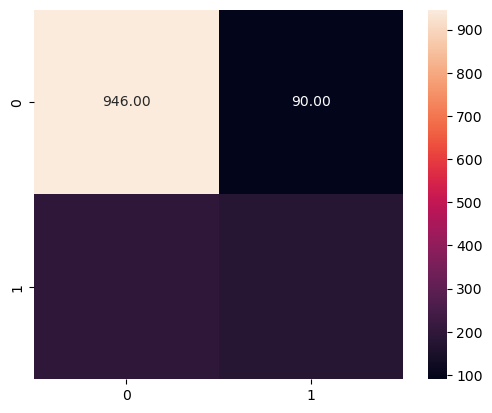

In [341]:
# Display Results
print('Logistic Regression')
print('accuracy: ', accuracy)
print('Classification_Report: \n',report)
print('confusion_matrix: \n', matrix)
sns.heatmap(matrix, annot=True, square=True, fmt='.2f', cbar=True)

In [350]:
# initialise model 2
Ran_For_Model = RandomForestClassifier()
Ran_For_Model.fit(X_train_Scaled, Y_train)

RandomForestClassifier()

In [351]:
# Make prediction with the test data set
Y_pred=Ran_For_Model.predict(X_test_Scaled)

In [352]:
Y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [353]:
# Evaluate and display the result of the model
print('Random Forest Classifier')
accuracy = accuracy_score(Y_test,Y_pred)*100
report = classification_report(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

Random Forest Classifier


Random Forest Classifier
accuracy:  75.8694109297374
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      1036
           1       0.58      0.32      0.41       373

    accuracy                           0.76      1409
   macro avg       0.68      0.62      0.63      1409
weighted avg       0.73      0.76      0.73      1409

confusion_matrix: 
 [[950  86]
 [254 119]]


<Axes: >

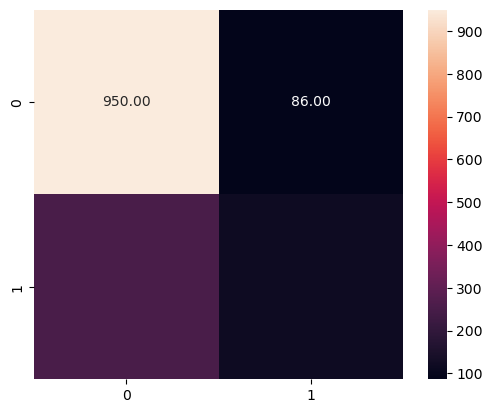

In [354]:
# Display Results
print('Random Forest Classifier')
print('accuracy: ', accuracy)
print('Classification_Report: \n',report)
print('confusion_matrix: \n', matrix)
sns.heatmap(matrix, annot=True, square=True, fmt='.2f', cbar=True)

In [355]:
## initialise model 3
Dec_Tre_Model = DecisionTreeClassifier()
# Train the model with your data
Dec_Tre_Model.fit(X_train_Scaled, Y_train)

DecisionTreeClassifier()

In [356]:
# Make prediction with the test data set
Y_pred=Dec_Tre_Model.predict(X_test_Scaled)

In [357]:
Y_pred

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [359]:
# Evaluate and display the result of the model
print('Decision Tree Classifier')
accuracy = accuracy_score(Y_test,Y_pred)*100
report = classification_report(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

Decision Tree Classifier


Decision Tree Classifier
accuracy:  71.11426543647977
Classification_Report: 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      1036
           1       0.44      0.35      0.39       373

    accuracy                           0.71      1409
   macro avg       0.61      0.60      0.60      1409
weighted avg       0.69      0.71      0.70      1409

confusion_matrix: 
 [[870 166]
 [241 132]]


<Axes: >

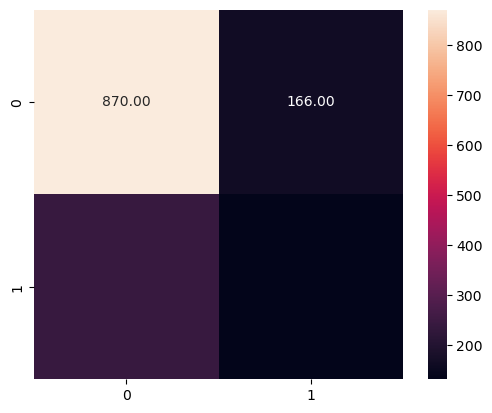

In [361]:
print('Decision Tree Classifier')
print('accuracy: ', accuracy)
print('Classification_Report: \n',report)
print('confusion_matrix: \n', matrix)
sns.heatmap(matrix, annot=True, square=True, fmt='.2f', cbar=True)

In [402]:
## initialise model 4
SVC = SVC()
# Train the model with your DATA
SVC.fit(X_train_Scaled, Y_train)

SVC()

In [403]:
# Make prediction with the test data set
Y_pred=SVC.predict(X_test_Scaled)

In [404]:
Y_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [405]:
# Evaluate and display the result of the model
print('SVC')
accuracy = accuracy_score(Y_test,Y_pred)*100
report = classification_report(Y_test,Y_pred)
matrix = confusion_matrix(Y_test,Y_pred)

SVC


SVC
accuracy:  79.84386089425124
Classification_Report: 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.72      0.39      0.51       373

    accuracy                           0.80      1409
   macro avg       0.77      0.67      0.69      1409
weighted avg       0.79      0.80      0.78      1409

confusion_matrix: 
 [[979  57]
 [227 146]]


<Axes: >

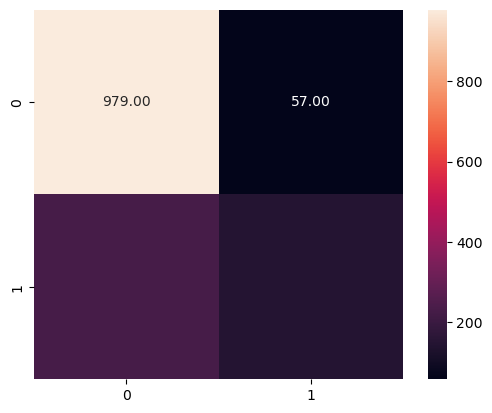

In [406]:
# Display Results
print('SVC')
print('accuracy: ', accuracy)
print('Classification_Report: \n',report)
print('confusion_matrix: \n', matrix)
sns.heatmap(matrix, annot=True, square=True, fmt='.2f', cbar=True)